1a)

$5\times 10^6 bp \times {1 amino acid \over 3 bp}\times {1 protein \over 300 amino acids}\approx 6000 proteins$

$100\times 10^6 bp \times {1 amino acid \over 3 bp}\times {1 protein \over 300 amino acids}\approx 1\times10^5 proteins$

1b)

Using the scale bar we estimate that the blue strand is 2000 bp long. Of those 2000 bp we again use the scale bar to estimate that there are about 1200 bp in which the strands are relatively aligned.

So we have ${2000-1200\over 2000}=0.4=40\%$ exon and 60% intron

1c)

$758aa\times {3 bp exon\over 1 aa}\times{1bp\over .4 bp exon}\times{1 \over 4 min}\times{1 min\over 60sec}=24 nt/sec$

$\approx 5700$ bp long

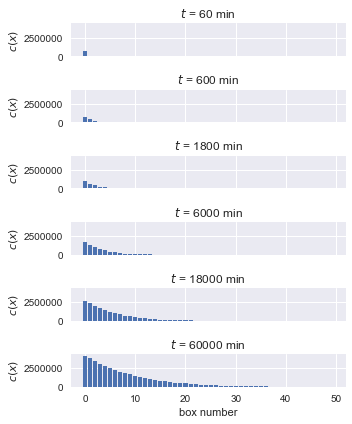

In [1]:
# 2a
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

tau = 3000
def master_equation(cc, k, dt):
    
    num_boxes, time_points = np.shape(cc)
    
    for t in range(1, time_points): 
        cc[0, t] = cc[0, t-1] + k * dt * cc[1, t-1] - k * dt * cc[0, t-1] + dt * (2 * 10 ** 4)
        
        last_box = num_boxes - 1
        cc[last_box, t] = cc[last_box, t-1] + \
                                k * dt * cc[last_box-1, t-1] -\
                                k * dt * cc[last_box, t-1]  
                
                
        for box in range(1, num_boxes - 1):
            cc[box, t] = cc[box, t-1] + k * dt * cc[box-1, t-1] +\
                           k * dt * cc[box+1, t-1] -\
                           2 * k * dt * cc[box, t-1] - (dt * cc[box, t-1] / tau)

    return c



k = .05
dt = 1 / 20
num_boxes = 50
time_steps = 60001
tau = 3000

c = np.zeros((num_boxes, time_steps))

initial_position = 0  
c[initial_position, 0] = 7.5E5

c = master_equation(c, k, dt)

time_points = [1*60, 10*60, 30*60, 100*60, 300*60, 1000*60]


bins = np.arange(0, num_boxes, 1)

fig, ax = plt.subplots(nrows=len(time_points), ncols=1, sharex=True, sharey=True,
                      figsize=(5, 6))

for i in range(len(time_points)):
    ax[i].bar(bins, c[:, time_points[i]])
    
    ax[i].set_title('$t$ = %s min' %(time_points[i]))
    ax[i].set_ylabel('$c(x)$')
    
ax[-1].set_xlabel('box number')

plt.tight_layout()

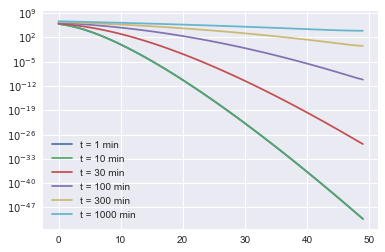

In [3]:
plt.plot(c[:, time_points[1]], label='t = 1 min')
plt.plot(c[:, time_points[1]], label='t = 10 min')
plt.plot(c[:, time_points[2]], label='t = 30 min')
plt.plot(c[:, time_points[3]], label='t = 100 min')
plt.plot(c[:, time_points[4]], label='t = 300 min')
plt.plot(c[:, time_points[5]], label='t = 1000 min')
plt.yscale('log')
plt.legend()

The profile doesn't quite reach a steady state solution in the 1000 minutes that we are looking at as the line doesn't become strait and horizontal. So the embryo definately won't reach steady state. Since the cycle takes 10 minutes we know that we need definately more than 100 cell cycles to reach steady state. The gradient is stable by the 10th cell cycle so it will never reach the 100th+ cell cycle.

2b)

we have: $c(x)=Ae^{\sigma x}={d^2c\over dx^2}={c\over D\tau}$

and ${d^2c\over dx^2}=\sigma^2Ae^{\sigma x}$

$$\sigma^2Ae^{\sigma x}={Ae^{\sigma x}\over D\tau}\Rightarrow \sigma=\pm\sqrt{{1\over D\tau}}\Rightarrow c(x)=Ae^{-\sqrt{1\over D\tau}x}$$

$$c(x)=A_0=Ae^0=A$$

2c)

$$c(x_{cf})\cdot G = c^*$$

$$GAe^{-x_{cf}\sqrt{1\over D\tau}}=c^*$$

$$Ae^{-x_{wild}\sqrt{1\over D\tau}}=c^*$$

$$GAe^{-x_{cf}\sqrt{1\over D\tau}}=Ae^{-x_{wild}\sqrt{1\over D\tau}}\Rightarrow x_{cf}=x_{wild}+\ln(G)\sqrt{\tau D}$$

Using matplotlib backend: MacOSX
0.5x BCD forrow_pos is: 0.264074143743


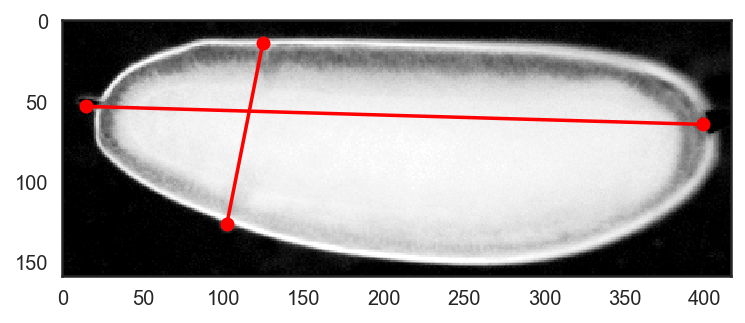

In [17]:
# 3a

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io
%matplotlib

im = skimage.io.imread('/Users/eli/Documents/bi1/pinkus_eli_hw8/for_posting/0.5xBcd.tif')



with sns.axes_style("white"):
    plt.imshow(im)
    
clicks = plt.ginput(2)
ant_x = clicks[0][0]
ant_y = clicks[0][1]
post_x = clicks[1][0]
post_y = clicks[1][1]

with sns.axes_style("white"):
    plt.plot((ant_x, post_x), (ant_y, post_y), color='r', marker='o')

    
clicks2 = plt.ginput(2)

lat1_x = clicks2[0][0]
lat1_y = clicks2[0][1]
lat2_x = clicks2[1][0]
lat2_y = clicks2[1][1]

with sns.axes_style("white"):
    plt.plot((lat1_x, lat2_x), (lat1_y, lat2_y), color='r', marker='o')

furrow_click = plt.ginput(1)
furr_x = furrow_click[0][0]
furr_y = furrow_click[0][1]

ant_post = np.sqrt((post_y - ant_y)**2 + (post_x - ant_x)**2)
ant_furr = np.sqrt((furr_y - ant_y)**2 + (furr_x - ant_x)**2)

rel_furrow_pos_pt5 = ant_furr / ant_post

print('0.5x BCD forrow_pos is: '+ str(rel_furrow_pos_pt5))

1x BCD forrow_pos is: 0.301514042688


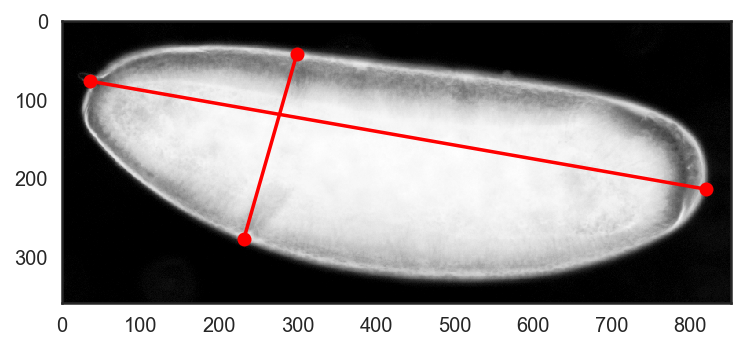

In [18]:
im = skimage.io.imread('/Users/eli/Documents/bi1/pinkus_eli_hw8/for_posting/1xBcd.tif')



with sns.axes_style("white"):
    plt.imshow(im)
    
clicks = plt.ginput(2)
ant_x = clicks[0][0]
ant_y = clicks[0][1]
post_x = clicks[1][0]
post_y = clicks[1][1]

with sns.axes_style("white"):
    plt.plot((ant_x, post_x), (ant_y, post_y), color='r', marker='o')

    
clicks2 = plt.ginput(2)

lat1_x = clicks2[0][0]
lat1_y = clicks2[0][1]
lat2_x = clicks2[1][0]
lat2_y = clicks2[1][1]

with sns.axes_style("white"):
    plt.plot((lat1_x, lat2_x), (lat1_y, lat2_y), color='r', marker='o')

furrow_click = plt.ginput(1)
furr_x = furrow_click[0][0]
furr_y = furrow_click[0][1]

ant_post = np.sqrt((post_y - ant_y)**2 + (post_x - ant_x)**2)
ant_furr = np.sqrt((furr_y - ant_y)**2 + (furr_x - ant_x)**2)

rel_furrow_pos_1 = ant_furr / ant_post

print('1x BCD forrow_pos is: '+ str(rel_furrow_pos_1))

2x BCD forrow_pos is: 0.362876086363


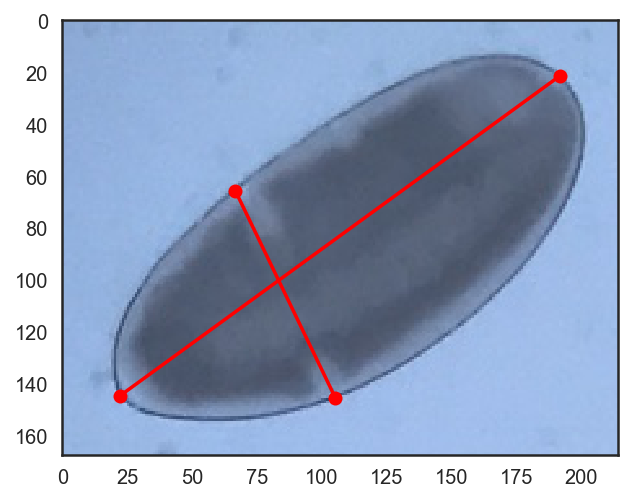

In [19]:
im = skimage.io.imread('/Users/eli/Documents/bi1/pinkus_eli_hw8/for_posting/2xBcd.tif')



with sns.axes_style("white"):
    plt.imshow(im)
    
clicks = plt.ginput(2)
ant_x = clicks[0][0]
ant_y = clicks[0][1]
post_x = clicks[1][0]
post_y = clicks[1][1]

with sns.axes_style("white"):
    plt.plot((ant_x, post_x), (ant_y, post_y), color='r', marker='o')

    
clicks2 = plt.ginput(2)

lat1_x = clicks2[0][0]
lat1_y = clicks2[0][1]
lat2_x = clicks2[1][0]
lat2_y = clicks2[1][1]

with sns.axes_style("white"):
    plt.plot((lat1_x, lat2_x), (lat1_y, lat2_y), color='r', marker='o')

furrow_click = plt.ginput(1)
furr_x = furrow_click[0][0]
furr_y = furrow_click[0][1]

ant_post = np.sqrt((post_y - ant_y)**2 + (post_x - ant_x)**2)
ant_furr = np.sqrt((furr_y - ant_y)**2 + (furr_x - ant_x)**2)

rel_furrow_pos_2 = ant_furr / ant_post

print('2x BCD forrow_pos is: '+ str(rel_furrow_pos_2))

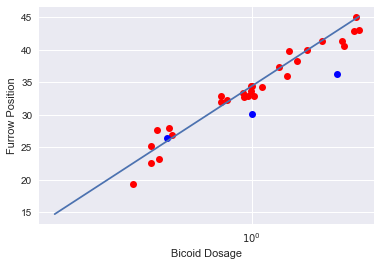

In [23]:
#3b

%matplotlib inline

import pandas as pd

data = pd.read_csv('/Users/eli/Documents/bi1/pinkus_eli_hw8/gregor_data.csv', comment='#')

for i in range (len(data['dosage_G'])):
    plt.plot(data['dosage_G'][i], data['furrow_pos'][i], 'ro')
    
plt.plot(.5, rel_furrow_pos_pt5 * 100 , 'bo')
plt.plot(1, rel_furrow_pos_1 * 100, 'bo')
plt.plot(2, rel_furrow_pos_2 * 100 , 'bo')


x = []
G = []

for i in range (0, 23):
    G.append((i+2)/10)
    x.append(34.4 + np.log(G[i]) * (300 * .5) ** (.5))

plt.plot(G, x)

plt.xscale('log')
plt.xlabel('Bicoid Dosage')
plt.ylabel('Furrow Position')

3c)


The data is somewhat consistent overall and certainly reflects general trends. Some errors can occur from human error in the clicking of the spots on the photos. If we create an unnecesarily steep angle for the connecting line the resulting calculated value will be noticable off from the theoretical expected value.